# 1 CNN for image classification

1. Set up your environment: Ensure that you have installed all the required software packages.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

2. Prepare your dataset: Choose a data set from UCI Machine Learning Repository that is appropriate for classification. Download the selected dataset.

3. Split the dataset into training, validation, and testing subsets using a ratio of 60% for training and 20% each for validation and testing sets.

In [2]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine train and test sets
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Normalize and reshape the input data
images = images / 255.0
images = images.reshape(-1, 28, 28, 1)  # Add the channel dimension

# Split the dataset into training, validation, and testing sets
train_images, temp_images, train_labels, temp_labels = train_test_split(images, labels, test_size=0.4, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

print("Training set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape, val_labels.shape)
print("Testing set shape:", test_images.shape, test_labels.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (42000, 28, 28, 1) (42000,)
Validation set shape: (14000, 28, 28, 1) (14000,)
Testing set shape: (14000, 28, 28, 1) (14000,)


4. Build the CNN model: A common CNN design consists of interleaving convolutional and max-pooling layers, ending with a linear classification layer

In [3]:
model = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,442 (275.16 KB)

 Trainable params: 70,442 (275.16 KB)

 Non-trainable params: 0 (0.00 B)

7. Train the model: Train the model using the training data for 20 epochs and plot
training and validation loss for with respect to epoch. Here, for the optimizer
you may use adam and sparse categorical crossentropy as the loss function. Set
a suitable learning rate.

In [4]:
learning_rate = 0.0005
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 728ms/step - accuracy: 0.9529 - loss: 0.1614 - val_accuracy: 0.9710 - val_loss: 0.0994
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 733ms/step - accuracy: 0.9590 - loss: 0.1409 - val_accuracy: 0.9711 - val_loss: 0.0920
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 724ms/step - accuracy: 0.9611 - loss: 0.1313 - val_accuracy: 0.9734 - val_loss: 0.0878
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 715ms/step - accuracy: 0.9631 - loss: 0.1238 - val_accuracy: 0.9737 - val_loss: 0.0825
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 30s 717ms/step - accuracy: 0.9639 - loss: 0.1225 - val_accuracy: 0.9752 - val_loss: 0.0794
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 703ms/step - accuracy: 0.9668 - loss: 0.1120 - val_accuracy: 0.9755 - val_loss: 0.0777
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 709ms/step - accuracy: 0.9645 - loss: 0.1150 - val_accuracy: 0.9762 - val_loss: 0.0771
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 710ms/step - accuracy: 0.9687 - loss: 0.1064 - val_accu

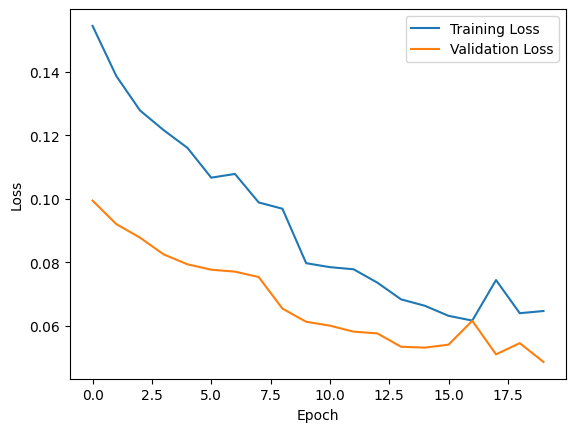

In [19]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

10. Evaluate the Model: After training, evaluate the model’s performance on the testing
dataset. Record the train/test accuracy, confusion matrix, precision and recall.

438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9836 - loss: 0.0517
Test accuracy: 0.9822142720222473
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


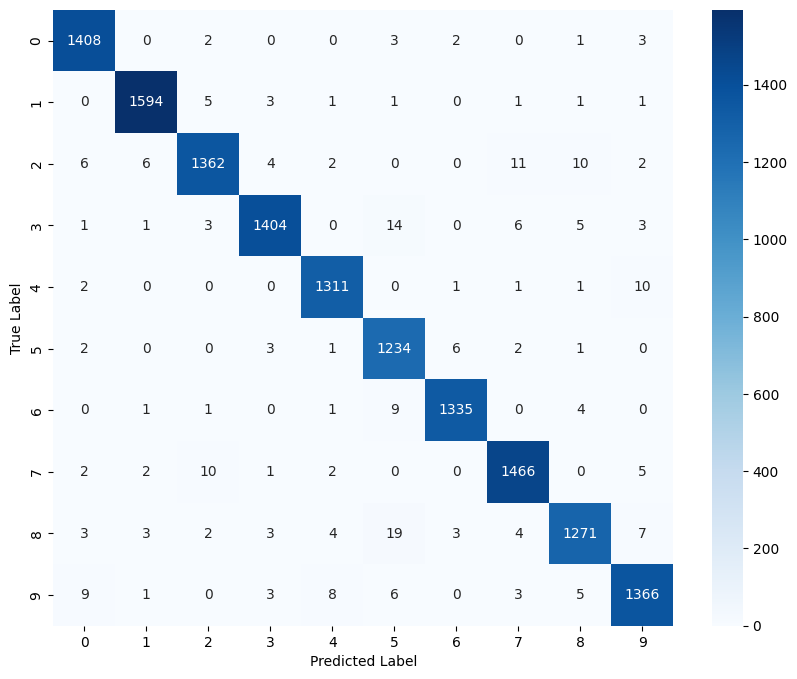

In [20]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

# Predict the classes for test images
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [21]:
# precision and recall
report = classification_report(test_labels, predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1419
           1       0.99      0.99      0.99      1607
           2       0.98      0.97      0.98      1403
           3       0.99      0.98      0.98      1437
           4       0.99      0.99      0.99      1326
           5       0.96      0.99      0.97      1249
           6       0.99      0.99      0.99      1351
           7       0.98      0.99      0.98      1488
           8       0.98      0.96      0.97      1319
           9       0.98      0.98      0.98      1401

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [22]:
# precision and recall
precision = precision_score(test_labels, predicted_classes, average='weighted')
recall = recall_score(test_labels, predicted_classes, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.9823
Recall: 0.9822


11. Plot training and validation loss for with respect to epoch for different learning rates
such as 0.0001, 0.001, 0.01, and 0.1. Comment on your results and select a learning
rate with a justification.

# 2 Compare your network with state-of-the-art networks

12. Choose two state-of-the-art pre-trained model
13. Load the pre-trained model and fine-tune it for the your dataset

In [13]:
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Adjust MNIST images to RGB for pretrained models
train_images_rgb = np.repeat(train_images, 3, axis = -1)
val_images_rgb = np.repeat(val_images, 3, axis = -1)
test_images_rgb = np.repeat(test_images, 3, axis = -1)

# Resize images to 32x32
train_images_rgb = tf.image.resize(train_images_rgb, [32, 32])
val_images_rgb = tf.image.resize(val_images_rgb, [32, 32])
test_images_rgb = tf.image.resize(test_images_rgb, [32, 32])

# Function to build and fine-tune a model
def build_fine_tune_model(base_model, input_shape, trainable = False):
    # Freeze the base model layers
    base_model.trainable = trainable

    # Build the model
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation = 'relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation = 'softmax')
    ])
    return model


# Load pretrained ResNet50
resnet_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))
resnet_model = build_fine_tune_model(resnet_base, input_shape = (32, 32, 3))

# Compile the ResNet model
resnet_model.compile(optimizer = Adam(learning_rate = 0.0005), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


# Load pretrained VGG16
vgg_base = VGG16(weights='imagenet', include_top = False, input_shape = (32, 32, 3))
vgg_model = build_fine_tune_model(vgg_base, input_shape = (32, 32, 3))

# Compile the VGG model
vgg_model.compile(optimizer = Adam(learning_rate = 0.0005), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


14. Train the fine-tuned model using the same training and testing data split as your custom CNN model
15. Record training and validation loss values for each epoch

In [14]:
# Train ResNet50
history_resnet = resnet_model.fit(train_images_rgb, train_labels, validation_data = (val_images_rgb, val_labels), epochs = 10, batch_size = 1024)

# Train VGG16
history_vgg = vgg_model.fit(train_images_rgb, train_labels, validation_data = (val_images_rgb, val_labels), epochs = 10, batch_size = 1024)


Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 259s 6s/step - accuracy: 0.2216 - loss: 2.4329 - val_accuracy: 0.6111 - val_loss: 1.5594
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 237s 5s/step - accuracy: 0.4764 - loss: 1.5887 - val_accuracy: 0.7251 - val_loss: 1.2363
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 225s 5s/step - accuracy: 0.5891 - loss: 1.3233 - val_accuracy: 0.7506 - val_loss: 1.0278
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 238s 5s/step - accuracy: 0.6430 - loss: 1.1407 - val_accuracy: 0.7817 - val_loss: 0.8889
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 265s 5s/step - accuracy: 0.6848 - loss: 1.0303 - val_accuracy: 0.7928 - val_loss: 0.7997
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 227s 5s/step - accuracy: 0.7058 - loss: 0.9580 - val_accuracy: 0.8187 - val_loss: 0.7125
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 224s 5s/step - accuracy: 0.7398 - loss: 0.8697 - val_accuracy: 0.8259 - val_loss: 0.6593
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 262s 5s/step - accuracy: 0.7464 - loss: 0.8233 - val_accuracy: 0.8393 - v

16. Evaluate the fine-tuned model on the testing dataset and calculate the test accuracy

438/438 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/step - accuracy: 0.8553 - loss: 0.5443
438/438 ━━━━━━━━━━━━━━━━━━━━ 161s 367ms/step - accuracy: 0.9098 - loss: 0.3469
ResNet50 Test Accuracy: 0.8559
VGG16 Test Accuracy: 0.9080


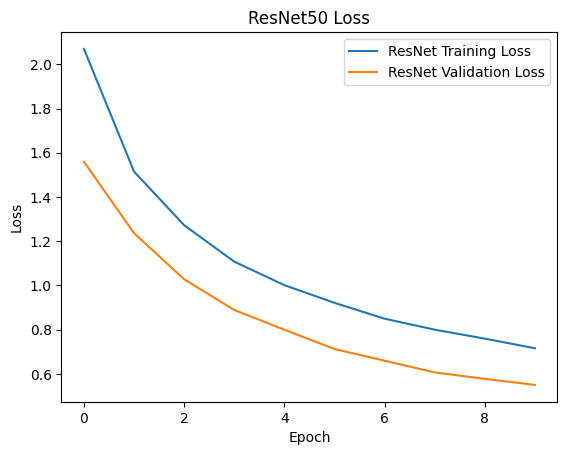

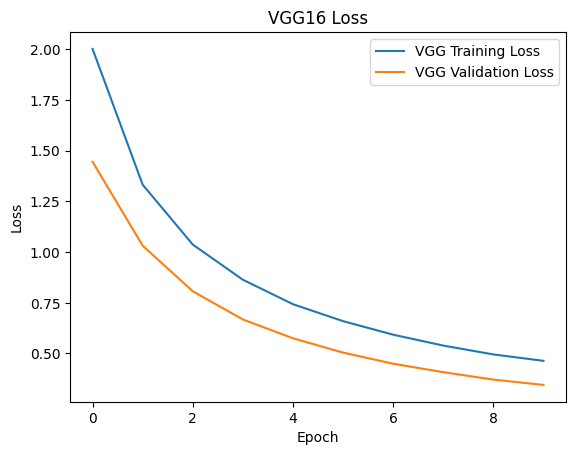

In [16]:
# Evaluate and Compare Both Models
resnet_test_loss, resnet_test_accuracy = resnet_model.evaluate(test_images_rgb, test_labels)
vgg_test_loss, vgg_test_accuracy = vgg_model.evaluate(test_images_rgb, test_labels)

print(f"ResNet50 Test Accuracy: {resnet_test_accuracy:.4f}")
print(f"VGG16 Test Accuracy: {vgg_test_accuracy:.4f}")

# Plot Training and Validation Loss for ResNet
plt.plot(history_resnet.history['loss'], label = 'ResNet Training Loss')
plt.plot(history_resnet.history['val_loss'], label = 'ResNet Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50 Loss")
plt.show()

# Plot Training and Validation Loss for VGG16
plt.plot(history_vgg.history['loss'], label = 'VGG Training Loss')
plt.plot(history_vgg.history['val_loss'], label = 'VGG Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("VGG16 Loss")
plt.show()


438/438 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/step


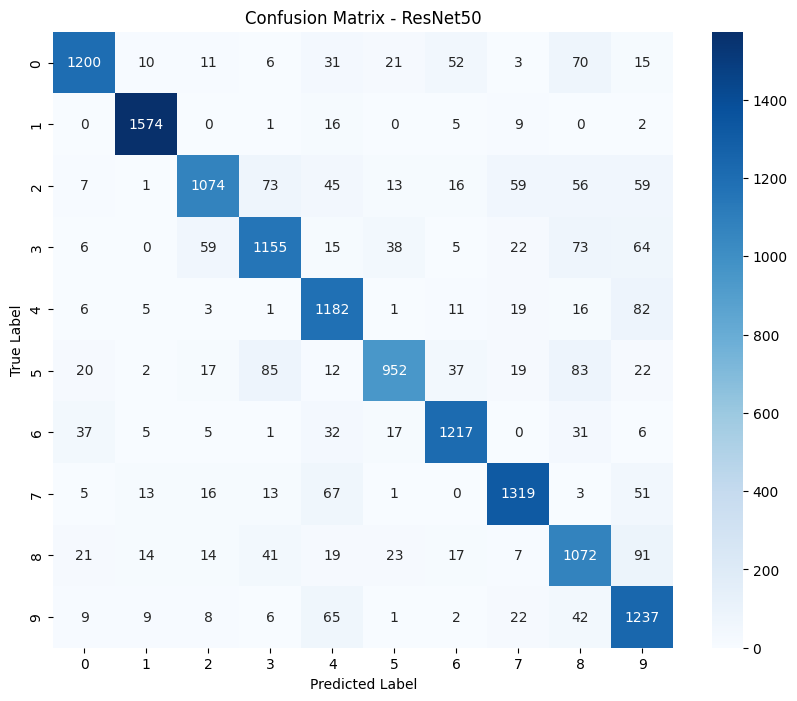

Classification Report for ResNet50:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      1419
           1       0.96      0.98      0.97      1607
           2       0.89      0.77      0.82      1403
           3       0.84      0.80      0.82      1437
           4       0.80      0.89      0.84      1326
           5       0.89      0.76      0.82      1249
           6       0.89      0.90      0.90      1351
           7       0.89      0.89      0.89      1488
           8       0.74      0.81      0.78      1319
           9       0.76      0.88      0.82      1401

    accuracy                           0.86     14000
   macro avg       0.86      0.85      0.85     14000
weighted avg       0.86      0.86      0.86     14000

438/438 ━━━━━━━━━━━━━━━━━━━━ 161s 366ms/step


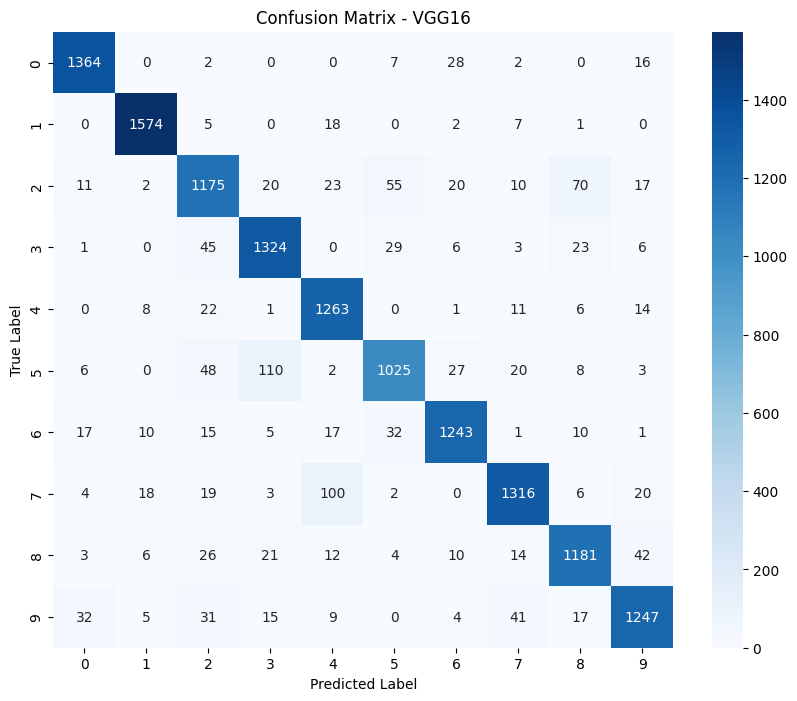

Classification Report for VGG16:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1419
           1       0.97      0.98      0.97      1607
           2       0.85      0.84      0.84      1403
           3       0.88      0.92      0.90      1437
           4       0.87      0.95      0.91      1326
           5       0.89      0.82      0.85      1249
           6       0.93      0.92      0.92      1351
           7       0.92      0.88      0.90      1488
           8       0.89      0.90      0.89      1319
           9       0.91      0.89      0.90      1401

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



In [17]:
# Predict and Generate Confusion Matrices
def plot_confusion_matrix(model, test_images, test_labels, model_name):
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis = 1)
    conf_matrix = confusion_matrix(test_labels, predicted_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    print(f"Classification Report for {model_name}:")
    print(classification_report(test_labels, predicted_classes, target_names=[str(i) for i in range(10)]))

# ResNet Confusion Matrix and Report
plot_confusion_matrix(resnet_model, test_images_rgb, test_labels, "ResNet50")

# VGG Confusion Matrix and Report
plot_confusion_matrix(vgg_model, test_images_rgb, test_labels, "VGG16")
